In [16]:
import os
os.chdir(os.getcwd().replace('/Code', ''))

In [17]:
import functions
import pandas as pd
import gzip
import pickle as pkl
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
from sklearn import decomposition, preprocessing
import seaborn as sns
from sklearn.manifold import TSNE

## Récupération de la matrice précédente

In [18]:
with gzip.open('Matrices/CVs4a_vocabulaire.pkl.gz', 'rb') as f:
        CVs = pkl.load(f)
CVs.shape

(8205, 3)

In [19]:
joincv = [" ".join(CVs.loc[cv]['vocab_cv_list']) for cv in CVs.index]

## Matrice d'occurrences

In [20]:
vectorizer = CountVectorizer(token_pattern="[\S]+")
X = vectorizer.fit_transform(joincv)
DataFrame_Count = pd.DataFrame(X.toarray(),  columns=vectorizer.get_feature_names(), index=CVs.index)
print("Le vocabulaire retenu contient", DataFrame_Count.shape[1], "tokens pour", DataFrame_Count.shape[0], 'cv.')

Le vocabulaire retenu contient 22270 tokens pour 8205 cv.


## Matrice TFIDF

In [21]:
vectorizer = TfidfVectorizer(token_pattern="[\S]+")
X = vectorizer.fit_transform(joincv)
DataFrame_TFIDF = pd.DataFrame(X.toarray(),  columns=vectorizer.get_feature_names(), index=CVs.index)
print(DataFrame_TFIDF.shape)

(8205, 22270)


# Représentation vectorielle des CV

Cumulative variance explained by 50  principal components: 0.19446542862905736


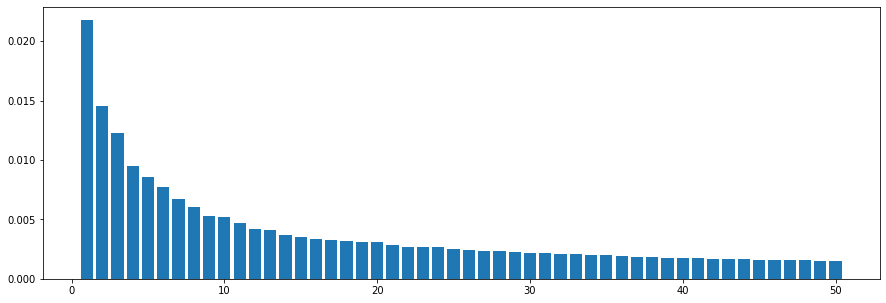

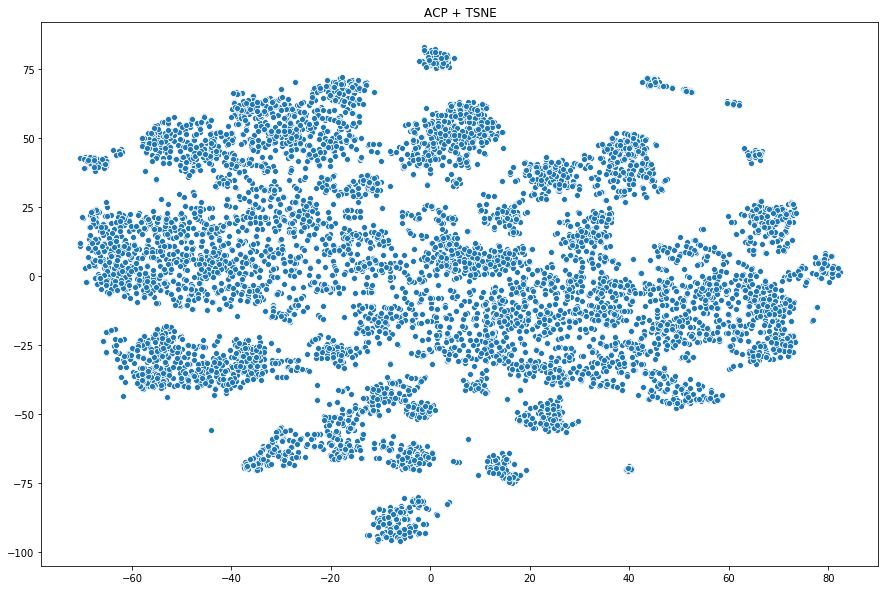

In [22]:
pca, tsne = functions.calcul_acp_tsne(DataFrame_TFIDF, nb_axes=50)
functions.representation_acp_tsne(tsne,pca, size_plot_tsne = (15,10))

In [23]:
def group(xmin,xmax,ymin,ymax, top=10):
    clusters =  ['red' if xmin<=tsne[j,0]<=xmax and ymin<= tsne[j,1]<=ymax else 'blue' for j in range(len(tsne)) ]
    sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=clusters)
    plt.xlabel("axe 0")
    plt.ylabel("axe 1")

    i = [j for j in range(len(tsne)) if xmin<=tsne[j,0]<=xmax and ymin<= tsne[j,1]<=ymax]
    id = list(CVs.index[i])
    print(len(id))
    print(id)
    sub_df_class = DataFrame_Count.loc[id]
    print(sub_df_class.astype(bool).sum(axis=0).sort_values(ascending=False)[0:top])
    return id

## Le groupe en haut à droite (TEST DE COMPETENCES)

67
['4970', '134', '7991', '4751', '3155', '8127', '556', '507', '3518', '6695', '7365', '7451', '1266', '861', '5837', '6686', '1543', '2835', '4676', '2718', '2399', '5267', '853', '6928', '4178', '206', '2762', '3412', '5422', '22', '1992', '4085', '6764', '7264', '321', '5886', '8623', '5102', '735', '1778', '5050', '4447', '4527', '4316', '5945', '3880', '1202', '4194', '147', '8310', '2174', '314', '695', '3505', '7734', '7987', '524', '1321', '1237', '8151', '583', '741', '7314', '2158', '6620', '6756', '2627']
bug            67
give           67
good           67
r              67
score          67
look           67
answer         67
work           67
program        67
reliability    67
dtype: int64


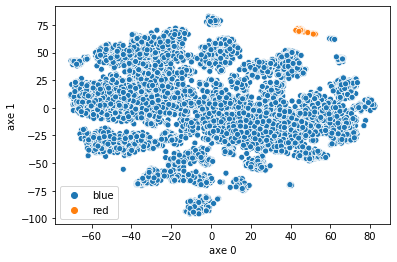

In [24]:
id_cv_test_competences1 = group(xmin=40, xmax=55, ymin=55, ymax=80)

27
['7100', '203', '1685', '5074', '8725', '723', '3929', '632', '4104', '2189', '2140', '506', '7499', '6059', '8633', '4887', '6038', '4442', '2867', '3220', '5932', '2819', '3500', '8758', '5084', '3027', '3364']
time          27
score         27
section       27
pdf           27
detail        26
proctoring    26
result        25
candidate     22
window        21
test          21
dtype: int64


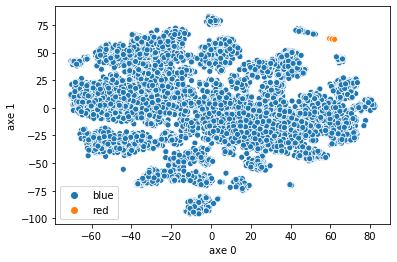

In [25]:
id_cv_test_competences2 = group(xmin=57, xmax=70, ymin=60, ymax=80)

In [26]:
id_cv_test_competences = id_cv_test_competences1 + id_cv_test_competences2
print(len(id_cv_test_competences))
with gzip.open('Matrices/id_cv_test_competences.pkl.gz', 'wb') as f:
    pkl.dump(id_cv_test_competences, f)

94


25
['4604', '6437', '701', '2966', '130', '4296', '4204', '4630', '470', '5805', '759', '2882', '7414', '4566', '2727', '2710', '5136', '7534', '64', '8162', '617', '5637', '2703', '8094', '8695']
candidate     25
entitle       25
court         25
datum         25
benefit       25
controller    25
resources     25
document      25
signature     25
respect       25
dtype: int64


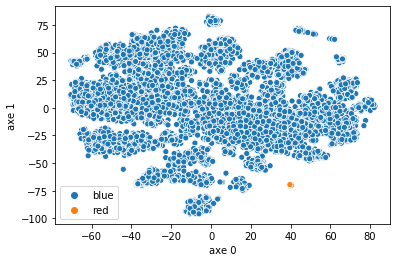

In [27]:
id_cv_accord_rgpd = group(xmin=30, xmax=60, ymin=-75, ymax=-60)
with gzip.open('Matrices/id_cv_accord_rgpd.pkl.gz', 'wb') as f:
    pkl.dump(id_cv_accord_rgpd, f)

### Suppression des id dans la matrice

In [28]:
print(CVs.shape)
try: CVs = CVs.drop(id_cv_test_competences)
except: print('')
try: CVs = CVs.drop(id_cv_accord_rgpd)
except: print('')
print(CVs.shape)

(8205, 3)
(8086, 3)


In [29]:
CVs.head()

,cv_list,len_cv_initial,vocab_cv_list
id_CV,,,
5711,"[jaouadi, junior, data, scientist, jaouadi, ju...",4477,"[junior, data, scientist, junior, data, scient..."
669,"[breton, consultant, moa, business, analysis, ...",6699,"[breton, consultant, moa, finance, confirm, do..."
938,"[read, write, talk, read, write, talk, read, s...",5769,"[read, write, talk, read, write, talk, read, c..."
1835,"[mr, nationality, french, date, birth, mail, p...",2353,"[java, j2ee, education, oracle, performance, t..."
266,"[de, reguardati, financial, engineer, de, regu...",4407,"[financial, engineer, financial, engineer, fin..."


In [30]:
with gzip.open('Matrices/CVs_FINALE.pkl.gz', 'wb') as f:
    pkl.dump(CVs, f)
with gzip.open('Matrices/CVs_SW_old.pkl.gz', 'wb') as f:
    pkl.dump(CVs, f)